In [1]:
## MACD calculation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
symbol = '2800.HK'
data = yf.Ticker(symbol)
df= data.history(period='6mo')  # pandas data frame

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-03,25.26,25.28,24.90,25.12,34523571,0,0
2020-08-04,25.30,25.76,25.20,25.62,42005921,0,0
2020-08-05,25.70,25.86,25.54,25.80,41502814,0,0
2020-08-06,25.84,25.88,25.28,25.60,47394786,0,0
2020-08-07,25.56,25.56,24.84,25.18,50509750,0,0
...,...,...,...,...,...,...,...
2021-01-28,29.12,29.32,28.60,28.70,247389991,0,0
2021-01-29,28.90,29.08,28.42,28.46,141637546,0,0
2021-02-01,28.54,29.16,28.54,29.06,129783654,0,0


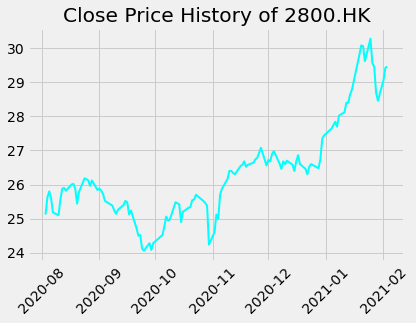

In [4]:
plt.plot(df['Close'], label='Close', color='aqua', lw=2)
plt.title('Close Price History of ' + symbol)
plt.xticks(rotation=45)
plt.show()

In [5]:
# Calculate the MACD and Signal line
## Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
## Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
## Calculate the MACD line
MACD = ShortEMA - LongEMA
## Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

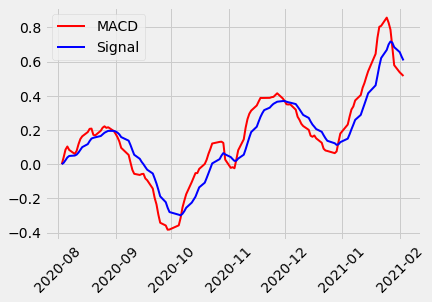

In [6]:
plt.plot(MACD, label='MACD', color='red', lw=2)
plt.plot(signal, label='Signal', color='blue', lw=2)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [7]:
# Add MACD and Signal as two new column to data frame
df['MACD'] = MACD
df['Signal'] = signal

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal
Date,,,,,,,,,
2020-08-03,25.26,25.28,24.90,25.12,34523571,0,0,0.000000,0.000000
2020-08-04,25.30,25.76,25.20,25.62,42005921,0,0,0.039886,0.007977
2020-08-05,25.70,25.86,25.54,25.80,41502814,0,0,0.085040,0.023390
2020-08-06,25.84,25.88,25.28,25.60,47394786,0,0,0.103494,0.039411
2020-08-07,25.56,25.56,24.84,25.18,50509750,0,0,0.083268,0.048182


In [8]:
# Function to make decision of to buy or to sell
def make_trade_decision(data):
    buy = []
    sell = []

    flag = -1

    for i in range(len(data)):
        if data['MACD'][i] > data['Signal'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(data['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)

        elif data['MACD'][i] < data['Signal'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(data['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)

        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return (buy, sell)

In [9]:
decision = make_trade_decision(df)

df['Buy'] = decision[0]
df['Sell'] = decision[1]

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal,Buy,Sell
Date,,,,,,,,,,,
2020-08-03,25.26,25.28,24.90,25.12,34523571,0,0,0.000000,0.000000,NaN,NaN
2020-08-04,25.30,25.76,25.20,25.62,42005921,0,0,0.039886,0.007977,25.62,NaN
2020-08-05,25.70,25.86,25.54,25.80,41502814,0,0,0.085040,0.023390,NaN,NaN
2020-08-06,25.84,25.88,25.28,25.60,47394786,0,0,0.103494,0.039411,NaN,NaN
2020-08-07,25.56,25.56,24.84,25.18,50509750,0,0,0.083268,0.048182,NaN,NaN


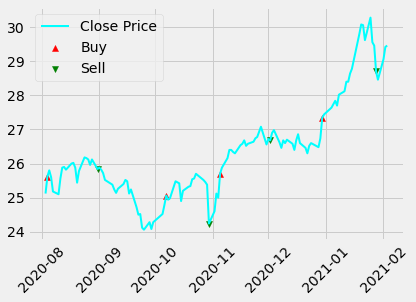

In [10]:
plt.scatter(df.index, df['Buy'], label='Buy', color='red', marker='^')
plt.scatter(df.index, df['Sell'], label='Sell', color='green', marker='v')
plt.plot(df['Close'], label='Close Price', color='aqua', lw=2)
plt.xticks(rotation=45)
plt.legend()
plt.show()